## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
import statsmodels.api as sm

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

## BASIC ANALYSIS

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [4]:
df[df.duplicated()]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
from datetime import datetime
df['Transaction date']=pd.to_datetime(df['Transaction date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Transaction date                          414 non-null    datetime64[ns]
 1   House Age                                 414 non-null    float64       
 2   Distance from nearest Metro station (km)  414 non-null    float64       
 3   Number of convenience stores              414 non-null    int64         
 4   latitude                                  414 non-null    float64       
 5   longitude                                 414 non-null    float64       
 6   Number of bedrooms                        414 non-null    int64         
 7   House size (sqft)                         414 non-null    int64         
 8   House price of unit area                  414 non-null    float64       
dtypes: datetime64[ns](1), float64(5),

In [8]:
df = df.drop(df.columns[[0]], axis=1)

In [9]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## VISUAL ANALYSIS

<AxesSubplot:>

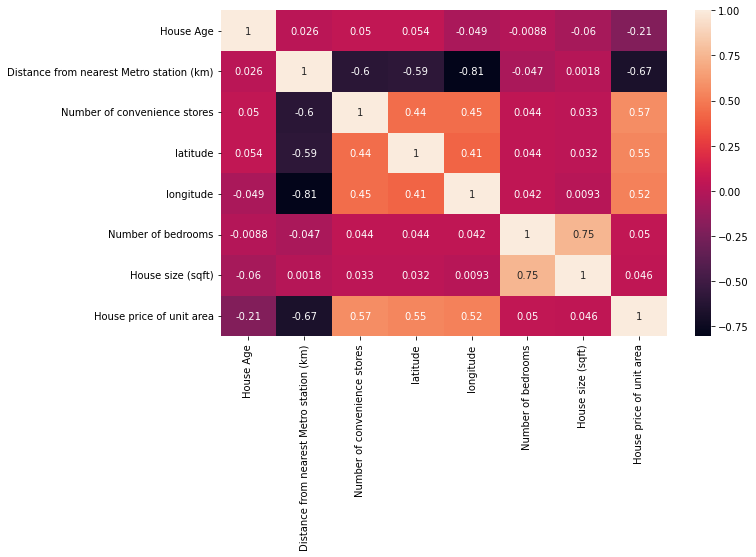

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'location of the houses')

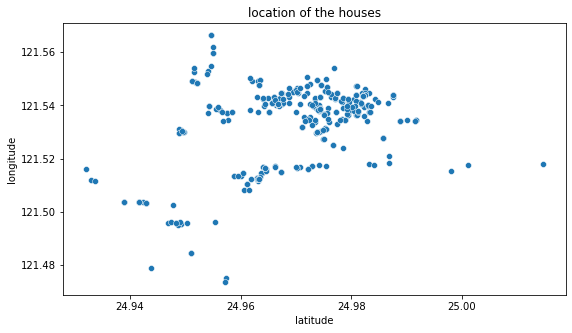

In [11]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['latitude'],df['longitude'])
plt.title('location of the houses')

Text(0.5, 1.0, 'Distance from nearest Metro station (km) vs Price')

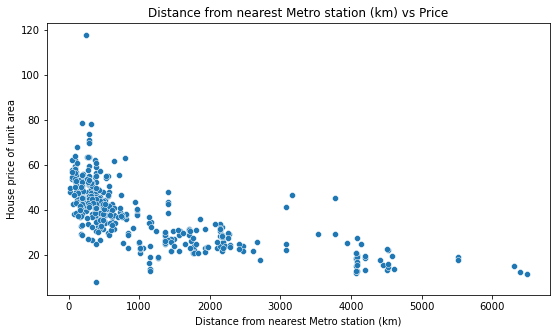

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['Distance from nearest Metro station (km)'],df['House price of unit area'])
plt.title('Distance from nearest Metro station (km) vs Price')

Text(0.5, 1.0, 'Number of convenience stores vs Price')

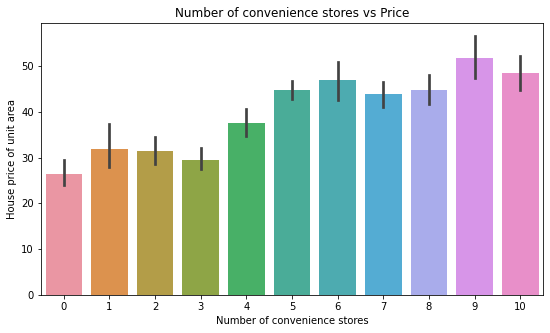

In [13]:
plt.figure(figsize=(9,5))
sns.barplot(df['Number of convenience stores'],df['House price of unit area'])
plt.title('Number of convenience stores vs Price')

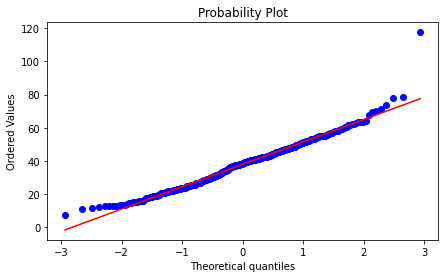

In [14]:
import scipy.stats as st
import pylab

plt.rcParams["figure.figsize"] = [7.00, 4.00]
st.probplot(df['House price of unit area'],dist = "norm",plot = pylab);

### BEFORE REMOVING OUTLIERS

In [15]:
# using ols model

x = df.drop(['House price of unit area'],axis=1)  # Independent Variable 
y = df['House price of unit area']                # Dependent Variable
Xc = sm.add_constant(x)                           # Constant  
lr_model = sm.OLS(y,Xc).fit()                     # Model fitting

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.572
Model:                                  OLS   Adj. R-squared:                  0.564
Method:                       Least Squares   F-statistic:                     77.37
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           8.50e-71
Time:                              17:33:20   Log-Likelihood:                -1492.3
No. Observations:                       414   AIC:                             3001.
Df Residuals:                           406   BIC:                             3033.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -4816.9273   6227.332     -0.774      0.440   -1.71e+04    7424.913
House Age                                   -0.2670      0.039     -6.805      0.000      -0.344      -0.190
Distance from nearest Metro station (km)    -0.0043      0.001     -5.899      0.000      -0.006      -0.003
Number of convenience stores                 1.1573      0.191      6.065      0.000       0.782       1.533
latitude                                   236.4899     45.088      5.245      0.000     147.854     325.125
longitude                                   -8.6067     49.266     -0.175      0.861    -105.455      88.241
Number of bedrooms                          -0.1663      0.823     -0.202      0.840      -1.785       1.452
House size (sqft)                            0.0010      0.002      0.527      0.599      -0.003       0.005
==============================================================================
Omnibus:                      237.529   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3628.444
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      16.879   Cond. No.                     2.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## REMOVING OUTLIERS

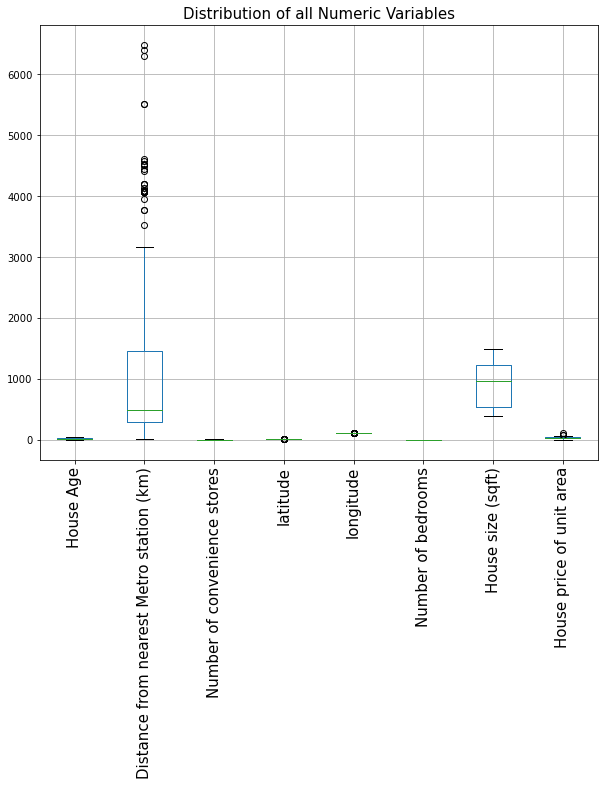

In [16]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (10,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [17]:
# before outlier treatement
df.shape

(414, 8)

In [18]:
# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = df.drop(['House price of unit area'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df.drop(['House price of unit area'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

In [19]:
df_no_outliers =df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape

(374, 8)

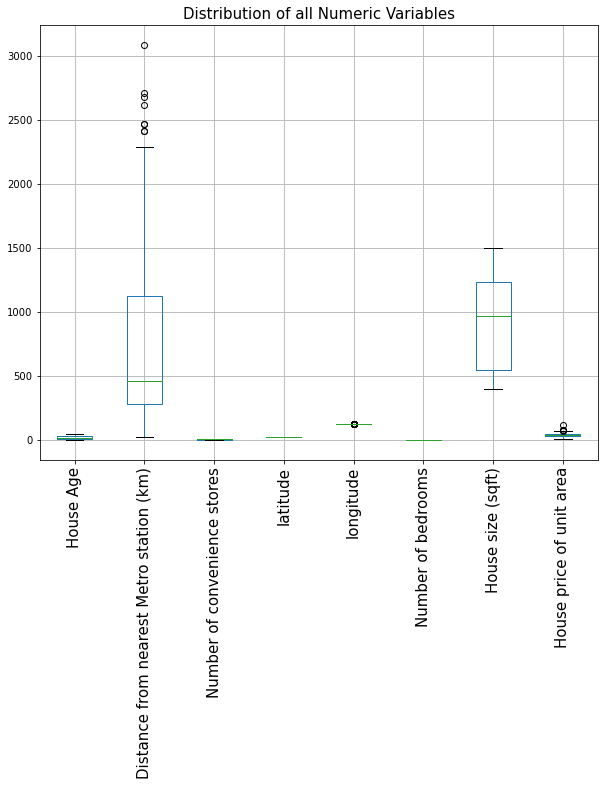

In [20]:
#We are selecting the columns that seems to have outliers except MonthlyIncome
plt.figure(figsize = (10,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_no_outliers.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [21]:
# we now have the data set with reduced amount of outliers.

## AFTER REMOVING OUTLIERS

In [22]:
x = df_no_outliers.drop(['House price of unit area'],axis=1)  
y = df_no_outliers['House price of unit area']                
Xc = sm.add_constant(x)                           
lr_model = sm.OLS(y,Xc).fit()                    

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.554
Model:                                  OLS   Adj. R-squared:                  0.546
Method:                       Least Squares   F-statistic:                     65.07
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           1.80e-60
Time:                              17:33:21   Log-Likelihood:                -1326.7
No. Observations:                       374   AIC:                             2669.
Df Residuals:                           366   BIC:                             2701.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -7446.9454   6609.427     -1.127      0.261   -2.04e+04    5550.274
House Age                                   -0.2986      0.038     -7.902      0.000      -0.373      -0.224
Distance from nearest Metro station (km)    -0.0091      0.001     -9.278      0.000      -0.011      -0.007
Number of convenience stores                 0.7499      0.189      3.962      0.000       0.378       1.122
latitude                                   311.9049     49.427      6.310      0.000     214.709     409.101
longitude                                   -2.4157     51.760     -0.047      0.963    -104.200      99.368
Number of bedrooms                           0.1647      0.828      0.199      0.842      -1.464       1.793
House size (sqft)                         5.666e-05      0.002      0.029      0.977      -0.004       0.004
==============================================================================
Omnibus:                      239.752   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4725.310
Skew:                           2.324   Prob(JB):                         0.00
Kurtosis:                      19.782   Cond. No.                     1.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## SCALING THE DATA USING STANDARD SCALER

In [24]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
def pre_processing(df):
    df_scaled = df.drop('House price of unit area', axis=1)
    df_target=df['House price of unit area']
    SS = StandardScaler()
    df_scaled=pd.DataFrame(SS.fit_transform(df_scaled),index=df_scaled.index,columns=df_scaled.columns)
    df_scaled= pd.concat([df_scaled,df_target],axis=1)
    return df_scaled

In [25]:
df_scaled=pre_processing(df)
df_scaled.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,37.9
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,42.2
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,47.3
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,54.8
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,43.1


## AFTER SCALING

In [26]:
x = df_scaled.drop(['House price of unit area'],axis=1)  
y = df_scaled['House price of unit area']               
Xc = sm.add_constant(x)                           
lr_model = sm.OLS(y,Xc).fit()                    

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.572
Model:                                  OLS   Adj. R-squared:                  0.564
Method:                       Least Squares   F-statistic:                     77.37
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           8.50e-71
Time:                              17:33:21   Log-Likelihood:                -1492.3
No. Observations:                       414   AIC:                             3001.
Df Residuals:                           406   BIC:                             3033.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       37.9802      0.441     86.030      0.000      37.112      38.848
House Age                                   -3.0376      0.446     -6.805      0.000      -3.915      -2.160
Distance from nearest Metro station (km)    -5.4058      0.916     -5.899      0.000      -7.207      -3.604
Number of convenience stores                 3.4049      0.561      6.065      0.000       2.301       4.509
latitude                                     2.9313      0.559      5.245      0.000       1.833       4.030
longitude                                   -0.1319      0.755     -0.175      0.861      -1.616       1.353
Number of bedrooms                          -0.1360      0.673     -0.202      0.840      -1.460       1.188
House size (sqft)                            0.3554      0.675      0.527      0.599      -0.972       1.683
==============================================================================
Omnibus:                      237.529   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3628.444
Skew:                           2.105   Prob(JB):                         0.00
Kurtosis:                      16.879   Cond. No.                         4.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF

In [29]:
x = df_scaled.drop(['House price of unit area'],axis=1)  
y = df_scaled['House price of unit area']     

X = sm.add_constant(x)



from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X1 = X[['House Age', 'Distance from nearest Metro station (km)','Number of convenience stores',
       'latitude','longitude','Number of bedrooms','House size (sqft)']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                                    feature       VIF
0                                 House Age  1.022479
1  Distance from nearest Metro station (km)  4.308998
2              Number of convenience stores  1.617328
3                                  latitude  1.602561
4                                 longitude  2.926037
5                        Number of bedrooms  2.326443
6                         House size (sqft)  2.338321


## SPLITTING THE DATASET INTO TRAIN TEST

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

x = df_scaled.drop(['House price of unit area'],axis=1)  
y = df_scaled['House price of unit area']
X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=1, test_size=0.20, shuffle=True)

## OLS

In [88]:
Xc = sm.add_constant(x)                          
ols_model = sm.OLS(y,Xc).fit() 
explained_ols = ols_model.rsquared_adj
explained_ols

0.564160306150935

## LINEAR REGRESSION MODEL

In [77]:

lr_model = LinearRegression().fit(X_train, y_train)
lr_model.score(X_test,y_test)
y_pred = lr_model.predict(X_test)
explained_lr = explained_variance_score(y_pred,y_test)
explained_lr

0.6373077961527951

## DECISION TREE REGRESSOR

In [79]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
dt_regressor.score(X_test,y_test)
pred_dt = dt_regressor.predict(X_test)
decision_score=dt_regressor.score(X_test,y_test)
explained_dt = explained_variance_score(pred_tr,y_test)
explained_dt

0.7109461924824233

## RANDOM FOREST REGRESSOR

In [80]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
explained_rf = explained_variance_score(rf_pred,y_test)
explained_rf

0.7478545456010812

In [89]:
print("Ordinary Least Squares Method Score is ",round(explained_ols*100))
print("Linear  Regression Model Score is ",round(explained_lr*100))
print("Decision tree  Regression Model Score is ",round(explained_dt*100))
print("Random Forest Regression Model Score is ",round(explained_rf*100))

Ordinary Least Squares Method Score is  56
Linear  Regression Model Score is  64
Decision tree  Regression Model Score is  71
Random Forest Regression Model Score is  75
